 0. Import the relevant libraries and packages

In [66]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

# Creating the choice set
From   
![image.png](https://cdn.jamanetwork.com/ama/content_public/journal/psych/938422/m_yoi190087ea.png?Expires=1691689740&Signature=OvJ06Ayrw5fJLEycmRUj9I6GyITQwp89ZN5rVQDOm8dU1z6ZvhwNCwFV8yKnBDDEgxFqnaUQWgV7viAKHn5NpRdiVPo-Rgc8kjwYTn-0dnbudBGSoeVtaw8gTSIUiLLnWWVj2sPafVJA9NhK3bivpgCt2RLxI2UJRYUuNUmrrx1CFwyJTKYPlljeVSSEZ3Iwc9dNmvZ4p71MmTQSt8a9KcXSmZ0r0IZhQ187TDnqEFIiAN3mv9A7snMUAnhROj0Fg1p5COdoTVA9Z3RVNw8AT8QgJNSKl44244OjAauQwcnETbDdh2NPeCv4NGXYVclFTopaMriRPqUO4y-QPdDQjw__&Key-Pair-Id=APKAIE5G5CRDK6RD3PGA)

We now have all the elements to calculate subjective value.


Code by: Santiago Guardo

Supervision: Ricardo Pizarro and Silvia Lopez

In [67]:
from matplotlib.gridspec import GridSpec
import sys

def scatter_hist(x, y, ax, ax_histx, ax_histy,xlabel='',ylabel='',title=''):
	ax.scatter(x, y)
	ax.set_xlabel(xlabel,fontsize=14)
	ax.set_ylabel(ylabel,fontsize=14)
	plt.suptitle(title,fontsize=20)
	ax_histx.hist(x,bins=20)
	ax_histy.hist(y, bins=20,orientation = 'horizontal')


def setup_fig_ax():

	fig = plt.figure(figsize=(10,8.5))
	gs = GridSpec(4, 4)

	ax = fig.add_subplot(gs[1:4, 0:3])
	ax_histx = fig.add_subplot(gs[0,0:3])
	ax_histy = fig.add_subplot(gs[1:4, 3])
	ax_histx.tick_params(axis="x", labelbottom=False)
	ax_histy.tick_params(axis="y", labelleft=False)

	return ax,ax_histx,ax_histy

def plot_scatter_hist(df):

	# delta SV v.s value_reward
	x,y = df['value_reward'],df['deltaSV'] 
	ax,ax_histx,ax_histy = setup_fig_ax()

	scatter_hist(x,y,ax,ax_histx,ax_histy, 
		xlabel='Value of Reward',
		ylabel= 'SV difference',
		title= 'SV difference v.s value of Reward')

	colors = ['r','g','b','c','y','m','k']
	df = df.sort_values('value_reward')
	print(df['p_reward'].unique())

	for i,p in enumerate(reversed(sorted(df['p_reward'].unique()))):
		print('index {} with p_reward is {}'.format(i,p))
		x,y = df.loc[df['p_reward']==p,'value_reward'], df.loc[df['p_reward']==p,'deltaSV']
		ax.plot(x, y,'{}o-'.format(colors[i]),label='prob={0:0.2f}'.format(p))

	# ax.plot([50],[],'r-')
	ax.axvline(x=50)
	# ax.plot([-50,-50],[-10,10],'r-')
	ax.axhline(y=0)
	# ax.plot([0,50],[0,0],'k--')
	ax.legend(loc="upper left")




In [68]:
''' Input should have this form

cols = ['crdm_lott_amt', 'crdm_lott_p', 'crdm_amb_lev', 'alpha', 'beta', 'gamma']

df_indif = pd.DataFrame([[20, 50, 0, 0.495323857, 0.495323857, 4.100226383]], columns= cols)
print(df_indif)
filename = 'csv/example_input.csv'
df_indif.to_csv(filename)

'''
subject_SE = 'csv/subject_input.csv'
df = pd.read_csv(subject_SE) 
df

,Unnamed: 0,crdm_lott_amt,crdm_lott_p,crdm_amb_lev,alpha,beta,gamma
0,0,20.0,50.0,0.0,0.495324,0.22168,4.100226


In [69]:
#Declare the variables
p = df['crdm_lott_p'].values[0]/100  #This is the probability of reward
v = df['crdm_lott_amt'].values[0] #The amount to be gained
alpha_pos = df['alpha'].values[0] #Participant's or ADO alpha parameter
beta_pos = df['beta'].values[0] #Participant's or ADO beta parameter
alpha_loss = 1.01*alpha_neg
beta_loss = 1.2*beta_neg
A= df['crdm_amb_lev'].values[0] #Ambiguity level
Vmax= 50.0 #The maximum amount we can pay to participants
Vmin = -50.0 #The minimum amount we can take from participants
Vsafe_pos = 5.0 # The safe option in positive trials
Vsafe_neg = -5.0 # The safe option in negative trials
#SV calculation and our probabilities options
# sv = (p - beta*A/2)*v**alpha
sv_pos = Vsafe_pos**alpha_pos
sv_neg = -(abs(Vsafe_neg))**alpha_loss
p_options = [0.87, 0.75, 0.62, 0.5, 0.38, 0.25, 0.13]

#Confirm the SE trial structure
print ('The probability of reward: ' + str(p))
print ('The amount to be earned: ' + str(v))
print ('The alpha parameter from the model: ' + str(alpha_pos))
print ('The beta parameter from the model: ' + str(beta_pos))
print ('The ambiguity level of the SE trial: ' + str(A))
print('The SV of the equivalence trial is ' + str(sv_pos))


The probability of reward: 0.5
The amount to be earned: 20.0
The alpha parameter from the model: 0.495323857
The beta parameter from the model: 0.221680178
The ambiguity level of the SE trial: 0.0
The SV of the equivalence trial is 2.2193025822510184


From the SV, we compute V, using the formula:

# $v = \left(\frac{SV}{p-\frac{\beta A}{2}}\right)^\frac{1}{\alpha}$


# 2. Create the choice set. 
For each probability level: 
- We want to make 3 trials around the point of subjective equality. 

- We want 2 extreme trials. One at $50 and one at the -SV of the 50\$ trial for each probability option. 

- We want 4 intermediate trials.  


In [70]:
#First, we compute the Subjective indiference trials.

def SE_options(sv, alpha, beta, A, trials='gains'): #This function take as parameters SV, alpha, beta and ambiguity level
  valuesP = {} #The output will be an empty dictionary with the probabilities as keys and rewards as values.
  for p in p_options: #A loop to iterate through all the probabilities optins.
    if trials=='gains':
      v_new = (sv / (p-beta*A/2)) ** (1 / alpha)
      if v_new <= Vmax:
        valuesP[p] = v_new #for every p it includes the calculated value
    if trials=='losses':
      v_new = -(abs(sv) / (p-beta*A/2)) ** (1 / alpha)
      if v_new >= Vmin:
        valuesP[p] = v_new #for every p it includes the calculated value
    
  return valuesP


In [71]:
# computing SE trials for positive and negative
new_choicesp = SE_options(sv_pos, alpha_pos,beta_pos,A,trials='gains')
SE_trials_pos = {k: round(v, 2) for k, v in new_choicesp.items()}
print('Gain trials with the same subjective value for all of our Prob options: \n' + str(SE_trials_pos))

new_choicesp = SE_options(sv_neg, alpha_loss,beta_loss,A,trials='losses')
SE_trials_neg = {k: round(v, 2) for k, v in new_choicesp.items()}
print('\nLoss trials with the same subjective value for all of our Prob options: \n' + str(SE_trials_neg))

Gain trials with the same subjective value for all of our Prob options: 
{0.87: 6.62, 0.75: 8.94, 0.62: 13.13, 0.5: 20.26, 0.38: 35.26}

Loss trials with the same subjective value for all of our Prob options: 
{0.87: -6.6, 0.75: -8.89, 0.62: -13.0, 0.5: -19.98, 0.38: -34.59}


- Next, we create new trials by adding and substracting \$2 from the SE trials values.

In [72]:
#Centered around subjective indifference +/- and $2
def centered (SE_trials):
  centrials2 = {}
  for k,v1 in SE_trials.items():
    centrials2[k] = [float(v1) - 2.0,float(v1) + 2.0]
  return centrials2

centrials_pos_pm = centered(SE_trials_pos)
print("Positive trials centered + - $2 around SE \n" + str(centrials_pos_pm))

centrials_neg_pm = centered(SE_trials_neg)
print("\nNegative trials centered + - $2 around SE \n" + str(centrials_neg_pm))

Positive trials centered + - $2 around SE 
{0.87: [4.62, 8.620000000000001], 0.75: [6.9399999999999995, 10.94], 0.62: [11.13, 15.13], 0.5: [18.26, 22.26], 0.38: [33.26, 37.26]}

Negative trials centered + - $2 around SE 
{0.87: [-8.6, -4.6], 0.75: [-10.89, -6.890000000000001], 0.62: [-15.0, -11.0], 0.5: [-21.98, -17.98], 0.38: [-36.59, -32.59]}


In [85]:
#Trials around SE (including the SE)
# merge centered and plus minus
def merge_centered(SE_trials,centrials1):
    centrials = {}
    for prob in SE_trials:
        value1 = float(SE_trials[prob]) #We convert the values in SE_trials into floats
        value2 = centrials1[prob] #We call the values from the centrials 1 dict. This have the plus/minus $2 but without the SE trials
        centrials[prob] = [value1] + value2 #Join the SE trials and the plus/minus $2 tirals
    return centrials

centrials_pos = merge_centered(SE_trials_pos,centrials_pos_pm)
print('Positive trials at SE and + - \$2: \n', centrials_pos)

centrials_neg = merge_centered(SE_trials_neg,centrials_neg_pm)
print('\n Negative trials at SE and + - \$2: \n', centrials_neg)


Positive trials at SE and + - \$2: 
 {0.87: [6.62, 4.62, 8.620000000000001], 0.75: [8.94, 6.9399999999999995, 10.94], 0.62: [13.13, 11.13, 15.13], 0.5: [20.26, 18.26, 22.26], 0.38: [35.26, 33.26, 37.26]}

 Negative trials at SE and + - \$2: 
 {0.87: [-6.6, -8.6, -4.6], 0.75: [-8.89, -10.89, -6.890000000000001], 0.62: [-13.0, -15.0, -11.0], 0.5: [-19.98, -21.98, -17.98], 0.38: [-34.59, -36.59, -32.59]}


In [107]:
empty_df = pd.DataFrame([],columns=['category','p_reward', 'value_reward'])

df_app = pd.DataFrame(centrials_pos.items(), columns=['p_reward', 'value_reward'])
df_app = df_app.explode('value_reward')
CentTrials_pos = pd.concat([empty_df, df_app], ignore_index=True)
CentTrials_pos['category'] = 'Cent_SE_pos'
CentTrials_pos


,category,p_reward,value_reward
0,Cent_SE_pos,0.87,6.62
1,Cent_SE_pos,0.87,4.62
2,Cent_SE_pos,0.87,8.62
3,Cent_SE_pos,0.75,8.94
4,Cent_SE_pos,0.75,6.94
5,Cent_SE_pos,0.75,10.94
6,Cent_SE_pos,0.62,13.13
7,Cent_SE_pos,0.62,11.13
8,Cent_SE_pos,0.62,15.13
9,Cent_SE_pos,0.50,20.26


In [108]:

df_app = pd.DataFrame(centrials_neg.items(), columns=['p_reward', 'value_reward'])
df_app = df_app.explode('value_reward')
CentTrials_neg = pd.concat([empty_df, df_app], ignore_index=True)
CentTrials_neg['category'] = 'Cent_SE_neg'
CentTrials_neg


,category,p_reward,value_reward
0,Cent_SE_neg,0.87,-6.6
1,Cent_SE_neg,0.87,-8.6
2,Cent_SE_neg,0.87,-4.6
3,Cent_SE_neg,0.75,-8.89
4,Cent_SE_neg,0.75,-10.89
5,Cent_SE_neg,0.75,-6.89
6,Cent_SE_neg,0.62,-13.0
7,Cent_SE_neg,0.62,-15.0
8,Cent_SE_neg,0.62,-11.0
9,Cent_SE_neg,0.50,-19.98


**Extreme trials:**

To create trials far way from the subjective equality point (SEP). We first make trials with a Value of reward of $50, which is the maximum amount we can pay to participants. Thus this is the highest subjective value we can reach.

In [93]:
def get_extreme(CentTrials,trials='gains'):
    extr = {} #Create an empty dict
    V = Vmax
    if trials=='losses':
        V = Vmin
    for p in CentTrials['p_reward'].unique(): #Iterate through the probability levels
        extr[p] = V #Assign them the 50 dollars value
    return extr

extrpos = get_extreme(CentTrials_pos)
print('Trials with the maximum Reward: \n', extrpos)

extrneg = get_extreme(CentTrials_neg,trials='losses')
print('\nTrials with the maximum Reward: \n', extrneg)



Trials with the maximum Reward: 
 {0.87: 50.0, 0.75: 50.0, 0.62: 50.0, 0.5: 50.0, 0.38: 50.0}

Trials with the maximum Reward: 
 {0.87: -50.0, 0.75: -50.0, 0.62: -50.0, 0.5: -50.0, 0.38: -50.0}


Now, let's find out what Value produces that SV_evil for all the probability levels. Those are going to be the extreme negative trials

       If SV<0:
# $v_{\text{evil}} = - \left( \frac{\left| SV \right|}{p - \frac{\beta \cdot A}{2}} \right) ^{\frac{1}{\alpha}}$

**BIG ASSUMPTION**
- In the previous formula, we are assuming that losses are represented equally than gains. 

In [111]:
#Let's make some calculations first

def get_extr_df(extr_dict,trials='gains'):
    df_app = pd.DataFrame(extr_dict.items(), columns=['p_reward', 'value_reward'])
    Extr_df = pd.concat([empty_df, df_app], ignore_index=True)
    category = 'Extr_pos'
    if trials=='losses':
        category = 'Extr_neg'
    Extr_df['category'] = category
    return Extr_df

ExtrPos = get_extr_df(extrpos)
ExtrNeg = get_extr_df(extrneg,trials='losses')
ExtrNeg


,category,p_reward,value_reward
0,Extr_neg,0.87,-50.0
1,Extr_neg,0.75,-50.0
2,Extr_neg,0.62,-50.0
3,Extr_neg,0.50,-50.0
4,Extr_neg,0.38,-50.0


In [77]:
#Intermediate pos and neg trials

def get_interm(prob,beta,alpha,Vsafe,Vmax,num_steps=3):

    num_steps = 3
    # define method to get deltaSV_max for different probabilities
    SV_int = {}
    intpos = {}
    for p in ExtrPos['p_reward'].unique(): 
        SV_max = (p - beta*A/2)*Vmax**alpha
        SV_safe = Vsafe_pos**alpha
        SV_steps = np.linspace(SV_safe,SV_max,num= num_steps + 2)
        SV_steps = SV_steps[1:-1].tolist()
        SV_int[p] = SV_steps
        v_steps = [(sv1 / (p - beta * A / 2)) ** (1 / alpha) for sv1 in SV_steps]
        intpos[p] = v_steps
    return intpos




{}

 {}


In [78]:
IntPos = pd.DataFrame(intpos.items(), columns=['p_reward', 'value_reward'])
IntPos = IntPos.explode('value_reward')
IntPos['category'] = 'IntPos'
IntPos  

,p_reward,value_reward,category


# concat three dataframes
CentTrials trials centered around Subjective Equality
ExtrPos trials in the extreme where value reward is $50
IntPor trials in between along range (SE and SVmax)

In [79]:
df_pos = pd.concat([CentTrials, ExtrPos, IntPos],ignore_index=True)
df_pos['value_safe'] = Vsafe_pos
df_pos

,category,p_reward,value_reward,value_safe
0,Cent_SE,0.87,6.54,5.0
1,Cent_SE,0.87,4.54,5.0
2,Cent_SE,0.87,8.54,5.0
3,Cent_SE,0.75,8.82,5.0
4,Cent_SE,0.75,6.82,5.0
5,Cent_SE,0.75,10.82,5.0
6,Cent_SE,0.62,12.95,5.0
7,Cent_SE,0.62,10.95,5.0
8,Cent_SE,0.62,14.95,5.0
9,Cent_SE,0.50,20.0,5.0


In [80]:
df_pos['SV_reward'] = (df_pos['p_reward'] - beta*A/2)*(df_pos['value_reward'])**alpha
df_pos['SV_safe'] = df_pos['value_safe']**alpha
df_pos['deltaSV'] = df_pos['SV_reward'] - df_pos['SV_safe']
df_pos

,category,p_reward,value_reward,value_safe,SV_reward,SV_safe,deltaSV
0,Cent_SE,0.87,6.54,5.0,2.205436,2.219303,-0.013867
1,Cent_SE,0.87,4.54,5.0,1.840665,2.219303,-0.378638
2,Cent_SE,0.87,8.54,5.0,2.517054,2.219303,0.297752
3,Cent_SE,0.75,8.82,5.0,2.204826,2.219303,-0.014476
4,Cent_SE,0.75,6.82,5.0,1.94113,2.219303,-0.278173
5,Cent_SE,0.75,10.82,5.0,2.439713,2.219303,0.22041
6,Cent_SE,0.62,12.95,5.0,2.204578,2.219303,-0.014725
7,Cent_SE,0.62,10.95,5.0,2.028796,2.219303,-0.190507
8,Cent_SE,0.62,14.95,5.0,2.367116,2.219303,0.147813
9,Cent_SE,0.50,20.0,5.0,2.204962,2.219303,-0.01434


[0.87 0.75 0.62 0.5  0.38]
index 0 with p_reward is 0.87
index 1 with p_reward is 0.75
index 2 with p_reward is 0.62
index 3 with p_reward is 0.5
index 4 with p_reward is 0.38


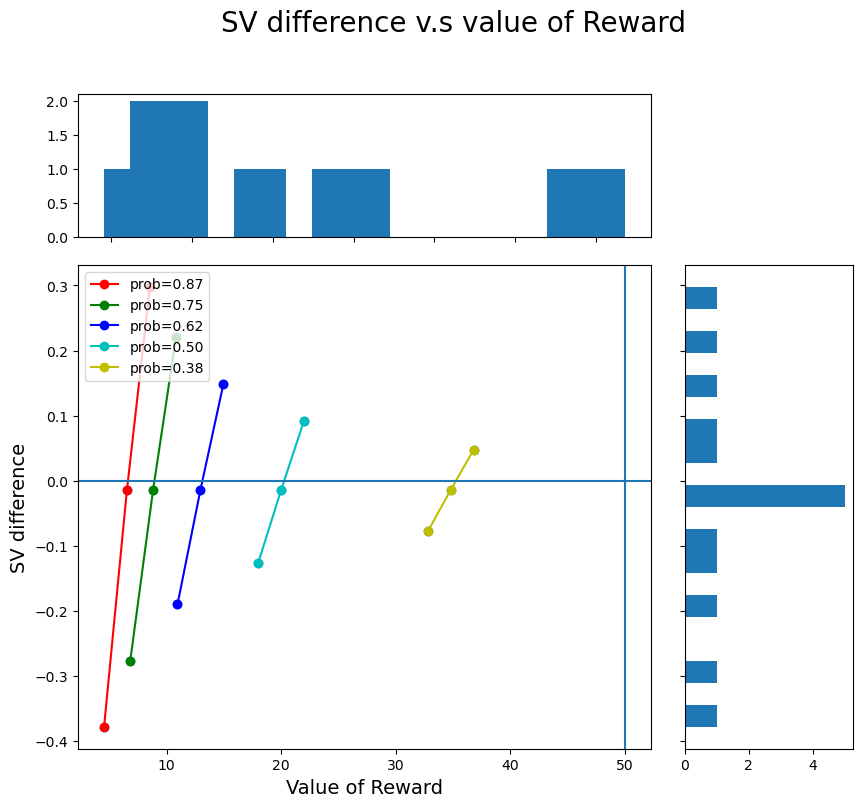

In [112]:
# plot positive values


plot_scatter_hist(df_pos)


In [82]:
""" for p in ExtrPos['p_reward'].unique():
        v_steps = [(sv1 / (p - beta * A / 2)) ** (1 / alpha) for sv1 in SV_steps]
    #print(p)
        print(v_steps)
    #print(SV_steps)
        intpos[p] = v_steps
    #for p in ExtrPos['p_reward'].unique():
     #   v_steps = [(sv1 / (p - beta * A / 2)) ** (1 / alpha) for sv1 in SV_steps]
      #  intpos[p] = v_steps
intpos """


" for p in ExtrPos['p_reward'].unique():\n        v_steps = [(sv1 / (p - beta * A / 2)) ** (1 / alpha) for sv1 in SV_steps]\n    #print(p)\n        print(v_steps)\n    #print(SV_steps)\n        intpos[p] = v_steps\n    #for p in ExtrPos['p_reward'].unique():\n     #   v_steps = [(sv1 / (p - beta * A / 2)) ** (1 / alpha) for sv1 in SV_steps]\n      #  intpos[p] = v_steps\nintpos "

In [83]:

deltasv1 = np.linspace(0,SV_max,num=5)
deltasv1 = deltasv1[1:-1].tolist()
deltasv_neg = [-1.0*d for d in deltasv1]
deltasv = sorted(deltasv1 + deltasv_neg)

SV_target = [d + (5**alpha) for d in deltasv] # Add SV_safe = 5.0**alpha to each element to get SV_lott

print(SV_target)



[0.24057851796327645, 0.9001532060591904, 1.5597278941551043, 2.8788772703469325, 3.538451958442846, 4.198026646538761]


In [84]:
#Create a dictionary using Probability as key and SV_evil as a value
svevil = df1.set_index('p_reward')['SV_evil (SV_SE - SV_MaxReward)'].to_dict() 
svevil

KeyError: 'SV_evil (SV_SE - SV_MaxReward)'

In [ ]:
def ExtrNeg_options(svevil, alpha, beta, A):
    NegvaluesP = {}  # The output will be an empty dictionary with the probabilities as keys and rewards as values.
    for p, sv1 in svevil.items():  # A loop to iterate through all the probabilities options.
        if sv1 < 0.0:
            v_evil = - (abs(sv1) / (p - beta * A / 2)) ** (1 / alpha)  # Assuming losses are represented equally than gains!
        else:
            v_evil = (sv1 / (p - beta * A / 2)) ** (1 / alpha)
        NegvaluesP[p] = v_evil  # for every p it includes the calculated value

    return NegvaluesP

# Call the function and store the result
NegvaluesP = ExtrNeg_options(svevil, alpha, beta, A)
extrneg = {k: round(v, 2) for k, v in NegvaluesP.items()}
print('Trials with the least SV for every prob option: \n' + str(extrneg))


In [ ]:
# Extreme trials. Convert the dictionary to a DataFrame
#ExtrPos = pd.DataFrame(extrpos.items(), columns=['p_reward', 'value_reward'])
ExtrNeg = pd.DataFrame(extrneg.items(), columns=['p_reward', 'value_reward'])
ExtrTrials = pd.concat([ExtrPos,ExtrNeg], ignore_index=True)
ExtrTrials

In [ ]:

ExtrTrials['category'] = 'ExtrTrials'
ExtrTrials['SV_reward'] = (ExtrTrials['p_reward'] - beta*A/2)*ExtrTrials['value_reward']**alpha 

ExtrTrials['SV_safe'] = 5.0**alpha
ExtrTrials['MaxReward'] = 50
ExtrTrials['SV_MaxReward'] = (ExtrTrials['p_reward'] - beta*A/2)*50**alpha 

ExtrTrials['deltaSV'] = ExtrTrials['SV_MaxReward'] - ExtrTrials['SV_safe']
#ExtrTrials['SV_evil'] = ExtrTrials['SV_SE_reward'] - ExtrTrials['deltaSV'] 


#Organizing
col = ExtrTrials.pop('category')
ExtrTrials.insert(0, col.name,col)
ExtrTrials


In [ ]:
#Intermidiate trials 
        
def SV_pos_int(sv, alpha, beta, A): #This function take as parameters SV, alpha, beta and ambiguity level
    int_pos = {} #probabilities as keys and rewards as a list values.
    for p in p_options: #A loop to iterate through all the probabilities options.
      v = []
      for sv in SV_target: #We want to use differente sv for each prob
        if sv < 0.0:
            v_new = - (abs(sv) / (p - beta * A / 2)) ** (1 / alpha)  # Assuming losses are represented equally than gains!
        else:
            v_new = (sv / (p - beta * A / 2)) ** (1 / alpha)  
        
        if v_new <50.0:
            v.append(v_new)  
        int_pos[p] = v #for every p it includes the calculated value
    return int_pos

int_choicesp = SV_pos_int(sv, alpha,beta,A)

print('Trials with positive subjective values: \n' + str(int_choicesp))

# Convert the dictionary to a DataFrame
dfint = pd.DataFrame(int_choicesp.items(), columns=['p_reward', 'value_reward'])
dfint = dfint.explode('value_reward')
dfint['value_reward'] = dfint['value_reward'].apply(lambda x: np.round(float(x), 2)) #Rounding value_reward
IntTrials = dfint.reset_index(drop=True)
IntTrials['category'] = 'IntTrials'
#Organizing
col = IntTrials.pop('category')
IntTrials.insert(0, col.name,col) 
IntTrials


# 4. The new choices CSV

In [ ]:
# Filter rows where 'value_reward' is less than or equal to 50
crdm_50filtered = crdm_trials[crdm_trials['value_reward'] <= 60]

# Specify the filename for the new CSV file with the filtered data
crdm_trials_50cap = 'csv/crdm_trials_50cap.csv'

# Save the filtered DataFrame to a new CSV file
crdm_50filtered.to_csv(crdm_trials_50cap, index=False)

print(f"CSV file filtered successfully.")
pd.read_csv(crdm_trials_50cap)

# 5. Let's check that it works
# - *a.k.a* Sanity check

In [ ]:

df_neg = df88.loc[df88['value_reward']<=0].reset_index(drop=True)
df_neg['value_safe'] = -5.0
df_neg['SV_reward'] = (df_neg['p_reward'] - beta*A/2)*(-1.0)*np.abs(df_neg['value_reward'])**alpha
df_neg['SV_safe'] = -1.0*abs(df_neg['value_safe'])**alpha
df_neg['deltaSV'] = df_neg['SV_reward'] - df_neg['SV_safe']

df_neg['category'] = 'loss'
df_neg

In [ ]:
#Concatenate the 2 trials set
df_posandneg= pd.concat([df_pos,df_neg],ignore_index=True)

#Adding the $50 cap
dfFINAL = df_posandneg[df_posandneg['value_reward'] <= 60]
dfFINAL

In [ ]:
#Scatter Plot
df = df_pos
plt.figure()
x = df['value_reward']
y = df['deltaSV']
plt.scatter(x,y)
plt.xlabel('Value of reward')
plt.ylabel('SV difference (no ambiuguity)')


In [ ]:
from matplotlib.gridspec import GridSpec

def scatter_hist(x, y, ax, ax_histx, ax_histy,xlabel='',ylabel='',title=''):
	ax.scatter(x, y)
	ax.set_xlabel(xlabel,fontsize=14)
	ax.set_ylabel(ylabel,fontsize=14)
	plt.suptitle(title,fontsize=20)
	ax_histx.hist(x,bins=20)
	ax_histy.hist(y, bins=20,orientation = 'horizontal')


def setup_fig_ax():

	fig = plt.figure()
	gs = GridSpec(4, 4)

	ax = fig.add_subplot(gs[1:4, 0:3])
	ax_histx = fig.add_subplot(gs[0,0:3])
	ax_histy = fig.add_subplot(gs[1:4, 3])
	ax_histx.tick_params(axis="x", labelbottom=False)
	ax_histy.tick_params(axis="y", labelleft=False)

	return ax,ax_histx,ax_histy

# delta SV v.s value_reward
x,y = df['value_reward'],df['deltaSV'] 
ax,ax_histx,ax_histy = setup_fig_ax()

scatter_hist(x,y,ax,ax_histx,ax_histy, 
    xlabel='Value of Reward',
    ylabel= 'SV difference',
    title= 'SV difference v.s value of Reward')

# To do:
- Is SV symmetrical in the losses --> prospect theory
- What to when SE_trials_reward > $50?
- Add ambiguity to the choice set. 

    

In [ ]:
#Inserting amibuity
import random
df = pd.read_csv(crdm_trials_50cap)

#Define the ambiguity options
crdm_amb_lvl = [24,50,74]


# number of ambiguous trials by type
N_AMB = 10
crdm_amb_opt = [N_AMB*[a] for a in crdm_amb_lvl]
crdm_amb_opt = [item for sublist in crdm_amb_opt for item in sublist]
print(crdm_amb_opt)
random.shuffle(crdm_amb_opt)
print(crdm_amb_opt)



In [ ]:

#Define the number of ambiguous trials by picking X number of random rows.
amb_trials = df.sample(n=len(crdm_amb_opt))

#Assign ambiguity values that match the number of random rows
# amb_levels = [random.choice(crdm_amb_opt) for x in range(15)]
#Assign those values to the random rows
amb_trials['crdm_amb_lev'] = crdm_amb_opt
amb_trials





In [ ]:

crdm_trials['crdm_amb_lev'] = 0.0
# choice_set = crdm_trials
choice_set = pd.concat([crdm_trials,amb_trials],ignore_index=True)

print(choice_set)



In [ ]:
import matplotlib.pyplot as plt

choice_set['SV_lottery'] = (choice_set['p_reward'] - beta*(choice_set['crdm_amb_lev']/100.0/2))*choice_set['value_reward']**alpha
choice_set['SV_safe'] = 5.0**alpha
choice_set['SV_diff'] = choice_set['SV_lottery'] - choice_set['SV_safe']
print(choice_set)

plt.figure(1)
plt.hist(choice_set.loc[choice_set['crdm_amb_lev']==0.0,'SV_diff'],bins=10)

plt.figure(2)
plt.hist(choice_set.loc[choice_set['crdm_amb_lev']>0.0,'SV_diff'],bins=10)



In [ ]:
plt.figure(4)
x = choice_set.loc[choice_set['crdm_amb_lev']==0.0,'value_reward']
y = choice_set.loc[choice_set['crdm_amb_lev']==0.0,'SV_diff']
plt.scatter(x,y)
plt.xlabel('Value of Reward')
plt.ylabel('SV difference (no ambiuguity)')


plt.figure(5)
x = choice_set.loc[choice_set['crdm_amb_lev']>0.0,'crdm_amb_lev']
y = choice_set.loc[choice_set['crdm_amb_lev']>0.0,'SV_diff']
plt.scatter(x,y)
plt.xlabel('Ambiguity level')
plt.ylabel('SV difference (ambiuguity)')



## It's not much but it's honest work
![python](https://plantillasdememes.com/img/plantillas/no-es-mucho-pero-es-trabajo-honesto01569991155.jpg)